# Libraries and Functions

In [4]:
from calibration_functions import *

import cv2
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import sys

In [ ]:
with open('../config.json') as f:
    config = json.load(f)
BASE_DIR = config["BASE_DIR"]

# Focal Length Estimation OpenCV

In [ ]:
image_list = [
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_000.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_001.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_002.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_003.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_004.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_005.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_006.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_007.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_008.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_009.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_010.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_011.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_012.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_013.jpg',
    BASE_DIR + '/data_1/multicast_new_new_reso_png/camera1/image_014.jpg',
    ]

In [ ]:
chessboard_size = (6, 10)
square_size = 25

objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2) * square_size

objpoints = []
imgpoints = []

images = image_list
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1),(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
        imgpoints.append(corners2)

        cv2.drawChessboardCorners(img, chessboard_size, corners2, ret)
        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.title('Chessboard corners detected')
        # plt.show()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

if ret:
    print("Camera calibrated successfully!")
    print("Camera matrix:\n", mtx)
    print("Distortion coefficients:\n", dist)
    print("Rotation Vectors:\n", rvecs)
    print("Translation Vectors:\n", tvecs)
else:
    print("Calibration failed.")

# Manual Focal Length Estimation

You're correct. Given the pixel size in micrometers (µm), we can calculate the physical dimensions of the sensor using the resolution. Let's go through the calculations step by step with the given pixel size.

### Step 1: Calculate Sensor Dimensions from Pixel Size and Resolution

Given:
- **Pixel Size**: 2.4 µm x 2.4 µm
- **Original Resolution**: 5472 x 3648 pixels

First, convert the pixel size from micrometers to millimeters:
- 2.4 µm = 0.0024 mm

Now, calculate the physical dimensions of the sensor:
- **Sensor Width** = Number of Pixels (Width) × Pixel Size (Width)
  $ \text{Sensor Width} = 5472 \, \text{pixels} \times 0.0024 \, \text{mm/pixel} = 13.1328 \, \text{mm} $
- **Sensor Height** = Number of Pixels (Height) × Pixel Size (Height)
  $ \text{Sensor Height} = 3648 \, \text{pixels} \times 0.0024 \, \text{mm/pixel} = 8.7552 \, \text{mm} $

### Step 2: Calculate Focal Length in Pixels for the Original Resolution

Given the physical focal length of the lens:
- **Physical Focal Length**: 16 mm

Calculate the pixel density (pixels per millimeter):
- **Pixel Density Width** = Number of Pixels (Width) / Sensor Width
  $ \text{Pixel Density Width} = \frac{5472 \, \text{pixels}}{13.1328 \, \text{mm}} \approx 416.87 \, \text{pixels/mm} $
- **Pixel Density Height** = Number of Pixels (Height) / Sensor Height
  $ \text{Pixel Density Height} = \frac{3648 \, \text{pixels}}{8.7552 \, \text{mm}} \approx 416.87 \, \text{pixels/mm} $

Calculate the focal length in pixels:
- **Focal Length in Pixels (Width)** = Physical Focal Length × Pixel Density Width
  $ \text{Focal Length in Pixels (Width)} = 16 \, \text{mm} \times 416.87 \, \text{pixels/mm} \approx 6669.92 \, \text{pixels} $
- **Focal Length in Pixels (Height)** = Physical Focal Length × Pixel Density Height
  $ \text{Focal Length in Pixels (Height)} = 16 \, \text{mm} \times 416.87 \, \text{pixels/mm} \approx 6669.92 \, \text{pixels} $

### Step 3: Adjust Focal Length for Downscaling and Cropping

Given the new resolution:
- **New Resolution**: 1624 x 1240 pixels

Calculate the scaling factors:
- **Scaling Factor Width** = New Width / Original Width
  $ \text{Scaling Factor Width} = \frac{1624}{5472} \approx 0.2968 $
- **Scaling Factor Height** = New Height / Original Height
  $ \text{Scaling Factor Height} = \frac{1240}{3648} \approx 0.3398 $

Adjust the focal length in pixels according to the scaling factors:
- **New Focal Length in Pixels (Width)** = Original Focal Length in Pixels (Width) × Scaling Factor Width
  $ \text{New Focal Length in Pixels (Width)} = 6669.92 \, \text{pixels} \times 0.2968 \approx 1978.12 \, \text{pixels} $
- **New Focal Length in Pixels (Height)** = Original Focal Length in Pixels (Height) × Scaling Factor Height
  $ \text{New Focal Length in Pixels (Height)} = 6669.92 \, \text{pixels} \times 0.3398 \approx 2266.42 \, \text{pixels} $

### Conclusion

Using the given pixel size of 2.4 µm x 2.4 µm and the provided resolutions, the recalculated focal lengths in pixels for the downscaled and slightly cropped image are approximately:

- **New Focal Length in Pixels (Width)**: 1978 pixels
- **New Focal Length in Pixels (Height)**: 2266 pixels

These values should be used for any image processing or computer vision applications that require knowledge of the camera's intrinsic parameters.

In [10]:
7.070912e+02

707.0912

In [9]:
def manual_focal_length(pixel_size:float, resolution: tuple):
    """
    Calculate the focal length of a camera using the formula: f = (P * R) / W
    Where:
      - P is the pixel size in mm
      - R is the resolution in pixels
      - W is the sensor width in mm
    """
    sensor_width = 5472 * 0.0024
    sensor_height = 3648 * 0.0024

    physical_focal_length = 16

    pixel_density_width =  5472 / sensor_width
    pixel_density_height = 3648 / sensor_height

    focal_length_width = physical_focal_length * pixel_density_width
    focal_length_height = physical_focal_length * pixel_density_height

    resolution_width = resolution[0]
    resolution_height = resolution[1]

    scaled_focal_length_width = focal_length_width * (resolution_width / 5472)
    scaled_focal_length_height = focal_length_height * (resolution_height / 3648)

    return scaled_focal_length_width, scaled_focal_length_height

print(manual_focal_length(0.0024, (1624, 1240)))
print(manual_focal_length(0.0024, (1624/2, 1240/2)))


(1978.5575048732944, 2266.08187134503)
(989.2787524366472, 1133.040935672515)


# DATASET 1

# convert depth to disparity origianl resolution

In [ ]:
pmf_depth_path            = os.path.join(BASE_DIR, 'data_1/ground_truth_pfm_rect_cor')
pmd_output_disparity_path = os.path.join(BASE_DIR, 'data_1/ground_truth_pfm_rect_cor_disp')

list_of_files = sorted([f for f in os.listdir(pmf_depth_path) if f.endswith('.pfm')])

focal_length_x = 1979  # focal length in pixels
baseline_mm = 110      # baseline in millimeters

for file in list_of_files:
    depth, scale = pfm_imread(os.path.join(pmf_depth_path, file))
    disparity = depth_to_disparity(focal_length_x, baseline_mm, depth)
    # convert to float32
    disparity = disparity.astype(np.float32)
    write_pfm(os.path.join(pmd_output_disparity_path, file), disparity)

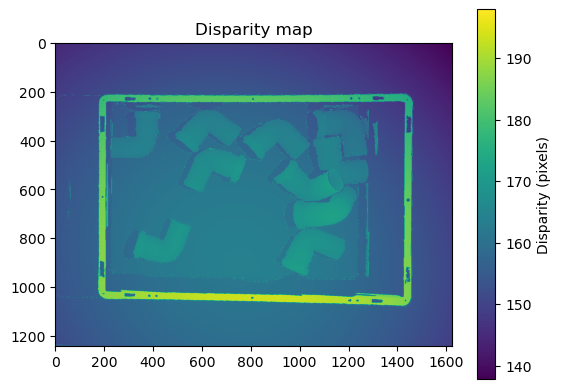

In [5]:

cor_pmf_path = os.path.join(BASE_DIR, 'data_1/ground_truth_pfm_rect_cor_disp/ground_truth_040.pfm')

depth, scale = pfm_imread(cor_pmf_path)
plt.imshow(depth)
plt.title('Disparity map')
plt.colorbar(label='Disparity (pixels)')
plt.show()

# convert depth to disparity half resolution

In [27]:
pmf_depth_path            = os.path.join(BASE_DIR, 'data_1/ground_truth_pfm_rect_cor')
pmd_output_disparity_path = os.path.join(BASE_DIR, 'data_1/ground_truth_pfm_rect_cor_disp_half')

list_of_files = sorted([f for f in os.listdir(pmf_depth_path) if f.endswith('.pfm')])

focal_length_x = 990  # focal length in pixels
baseline_mm    = 110  # baseline in millimeters

for file in list_of_files:
    depth, scale = pfm_imread(os.path.join(pmf_depth_path, file))
    depth        = reduce_depth_map_resolution(depth)
    disparity    = depth_to_disparity(focal_length_x, baseline_mm, depth)
    disparity    = disparity.astype(np.float32)
    write_pfm(os.path.join(pmd_output_disparity_path, file), disparity)

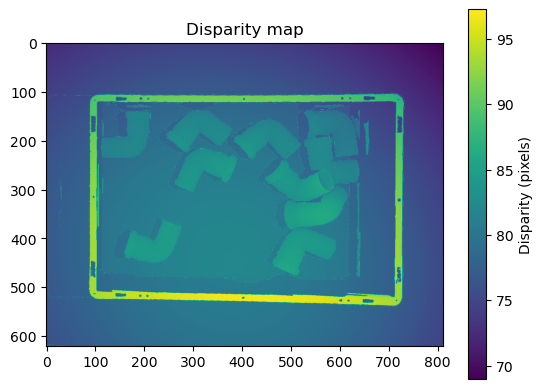

min depth: 68.97293853759766, max depth: 97.25331115722656


In [8]:
cor_pmf_path = os.path.join(BASE_DIR, 'data_1/ground_truth_pfm_rect_cor_disp_half/ground_truth_040.pfm')

depth, scale = pfm_imread(cor_pmf_path)
plt.imshow(depth)
plt.title('Disparity map')
plt.colorbar(label='Disparity (pixels)')
plt.show()
print(f"min depth: {np.min(depth)}, max depth: {np.max(depth)}")

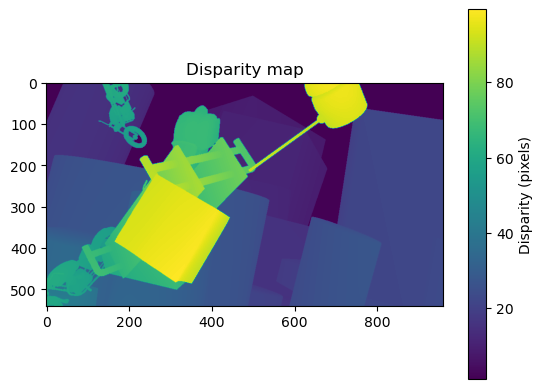

min depth: 1.1745235919952393, max depth: 99.39130401611328


In [7]:
depth, scale = pfm_imread(os.path.join(BASE_DIR, 'sceneflow/FlyingThings/FlyingThings3D_subeset/train/disparity/left/0000016.pfm'))
plt.imshow(depth)
plt.title('Disparity map')
plt.colorbar(label='Disparity (pixels)')
plt.show()

print(f"min depth: {np.min(depth)}, max depth: {np.max(depth)}")

# DATASET 2

# convert depth to disparity origianl resolution

In [31]:
pmf_depth_path            = os.path.join(BASE_DIR, 'data_2/ground_truth_pfm_rect_cor')
pmd_output_disparity_path = os.path.join(BASE_DIR, 'data_2/ground_truth_pfm_rect_cor_disp')

list_of_files = sorted([f for f in os.listdir(pmf_depth_path) if f.endswith('.pfm')])

focal_length_x = 1979  # focal length in pixels
baseline_mm = 110      # baseline in millimeters

for file in list_of_files:
    depth, scale = pfm_imread(os.path.join(pmf_depth_path, file))
    disparity = depth_to_disparity(focal_length_x, baseline_mm, depth)
    disparity = disparity.astype(np.float32)
    write_pfm(os.path.join(pmd_output_disparity_path, file), disparity)

# convert depth to disparity half resolution

In [32]:
pmf_depth_path            = os.path.join(BASE_DIR, 'data_2/ground_truth_pfm_rect_cor')
pmd_output_disparity_path = os.path.join(BASE_DIR, 'data_2/ground_truth_pfm_rect_cor_disp_half')

list_of_files = sorted([f for f in os.listdir(pmf_depth_path) if f.endswith('.pfm')])

focal_length_x = 990  # focal length in pixels
baseline_mm    = 110  # baseline in millimeters

for file in list_of_files:
    depth, scale = pfm_imread(os.path.join(pmf_depth_path, file))
    depth        = reduce_depth_map_resolution(depth)
    disparity    = depth_to_disparity(focal_length_x, baseline_mm, depth)
    disparity    = disparity.astype(np.float32)
    write_pfm(os.path.join(pmd_output_disparity_path, file), disparity)

# DATASET 3

# convert depth to disparity origianl resolution

In [33]:
pmf_depth_path            = os.path.join(BASE_DIR, 'data_3/ground_truth_pfm_rect_cor')
pmd_output_disparity_path = os.path.join(BASE_DIR, 'data_3/ground_truth_pfm_rect_cor_disp')

list_of_files = sorted([f for f in os.listdir(pmf_depth_path) if f.endswith('.pfm')])

focal_length_x = 1979  # focal length in pixels
baseline_mm = 110      # baseline in millimeters

for file in list_of_files:
    depth, scale = pfm_imread(os.path.join(pmf_depth_path, file))
    disparity = depth_to_disparity(focal_length_x, baseline_mm, depth)
    disparity = disparity.astype(np.float32)
    write_pfm(os.path.join(pmd_output_disparity_path, file), disparity)

# convert depth to disparity half resolution

In [34]:
pmf_depth_path            = os.path.join(BASE_DIR, 'data_3/ground_truth_pfm_rect_cor')
pmd_output_disparity_path = os.path.join(BASE_DIR, 'data_3/ground_truth_pfm_rect_cor_disp_half')

list_of_files = sorted([f for f in os.listdir(pmf_depth_path) if f.endswith('.pfm')])

focal_length_x = 990  # focal length in pixels
baseline_mm    = 110  # baseline in millimeters

for file in list_of_files:
    depth, scale = pfm_imread(os.path.join(pmf_depth_path, file))
    depth        = reduce_depth_map_resolution(depth)
    disparity    = depth_to_disparity(focal_length_x, baseline_mm, depth)
    disparity    = disparity.astype(np.float32)
    write_pfm(os.path.join(pmd_output_disparity_path, file), disparity)